In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
!pip install textblob

In [7]:
videos = pd.read_csv(r"E:\SentimentAnalysis\YouTube_DataSet\USvideos.csv", error_bad_lines=False);#opening the file USvideos
comm = pd.read_csv(r"E:\SentimentAnalysis\YouTube_DataSet\UScomments.csv", error_bad_lines=False);#opening the file UScomments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [8]:
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [9]:
comm['pol']=pol

comm['pol'][comm.pol==0]= 0

comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

<ipython-input-9-4d6da047354a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol==0]= 0
<ipython-input-9-4d6da047354a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol > 0]= 1
<ipython-input-9-4d6da047354a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol < 0]= -1


In [10]:
df_positive = comm[comm.pol==1]
df_positive.head()

,video_id,comment_text,likes,replies,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,1.0


(-0.5, 999.5, 499.5, -0.5)

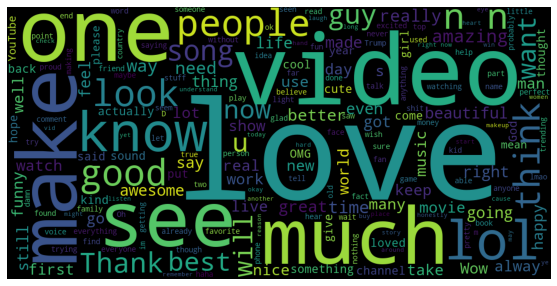

In [11]:
k= (' '.join(df_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

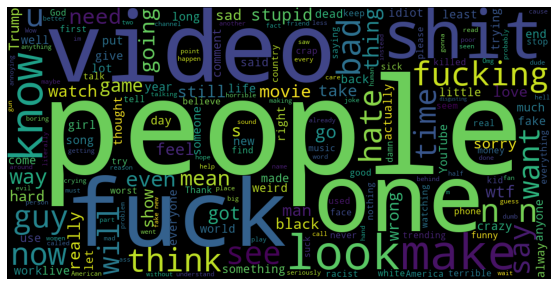

In [12]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

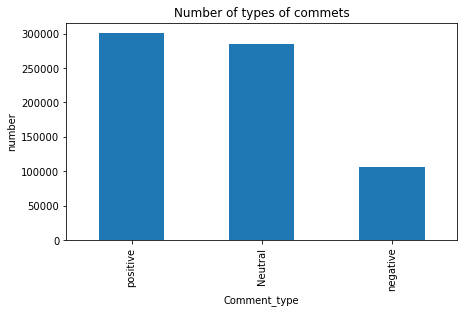

In [13]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

In [14]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [15]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,SMinvx9EkPs,72,4,27,103
1,HkoGtBEA1co,235,32,133,400
2,pcnlLwwR5x4,116,151,133,400
3,DyA64VLVfds,258,36,105,399
4,PPg1gN_ey2o,43,9,48,100
5,cpvUG_fo6lU,227,87,186,500


In [16]:
df_unique.to_csv('unique.csv',index=False,)

In [17]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [18]:
comm.head()

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [54]:
videos.trending_date.value_counts()

18.19.04    200
18.24.05    200
17.30.12    200
17.24.12    200
18.31.05    200
           ... 
18.01.02    197
18.31.01    197
18.03.02    196
18.04.02    196
18.02.02    196
Name: trending_date, Length: 205, dtype: int64

In [20]:
print(videos.video_id.value_counts()[:12]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:12].index

j4KvrAUjn6c    30
t4pRQ0jn23Q    29
8h--kFui1JA    29
NBSAQenU2Bk    29
iILJvqrAQ_w    29
r-3iathMo7o    29
MAjY8mCTXWk    29
QBL8IRJ5yHU    29
mdWcaWBxxcY    28
vjSohj-Iclc    28
YI3tsmFsrOg    28
WIV3xNz8NoM    28
Name: video_id, dtype: int64


In [22]:
videos[videos.video_id=='mdWcaWBxxcY']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34359,mdWcaWBxxcY,18.13.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",2766850,149643,15321,14195,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
34788,mdWcaWBxxcY,18.15.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",4429079,189112,22383,18998,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
34937,mdWcaWBxxcY,18.15.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",4429079,189112,22383,18998,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
34999,mdWcaWBxxcY,18.16.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",5145564,205018,24141,20273,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
35211,mdWcaWBxxcY,18.17.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",5907389,219921,25584,21435,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
35423,mdWcaWBxxcY,18.18.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",6794330,235426,26949,22532,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
35627,mdWcaWBxxcY,18.19.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",7766194,251880,28069,23403,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
35830,mdWcaWBxxcY,18.20.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",8748304,262701,28966,24167,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
36055,mdWcaWBxxcY,18.21.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",9600407,269968,29658,24493,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."
36263,mdWcaWBxxcY,18.22.05,"Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...",Rita Ora,24,2018-05-11T09:23:16.000Z,"Rita Ora|""Rita""|""Ora""|""Your Song""|""Anywhere""|""...",10423895,276209,30262,24926,https://i.ytimg.com/vi/mdWcaWBxxcY/default.jpg,False,False,False,"Rita Ora 'Girls' ft. Cardi B, Bebe Rexha & Cha..."


In [28]:
for i in most_trending:
    info =videos[videos.video_id== i][['title','channel_title','views','likes','dislikes', 'comment_count']].tail(1)# get the last row of the dataframe(total like,views,dislikes)
    print(info)
    print('****************************************************************************************')

                                            title     channel_title     views  \
40346  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  Lucas and Marcus  10381263   

        likes  dislikes  comment_count  
40346  163325     20892          25323  
****************************************************************************************
                                                   title channel_title  \
40339  YoungBoy Never Broke Again Goes Sneaker Shoppi...       Complex   

         views   likes  dislikes  comment_count  
40339  4654027  116674      5707          14279  
****************************************************************************************
                                             title      channel_title  \
39747  Sam Smith - Pray (Official Video) ft. Logic  SamSmithWorldVEVO   

          views   likes  dislikes  comment_count  
39747  20934803  359012      9294          12451  
*******************************************************************************

(-0.5, 999.5, 499.5, -0.5)

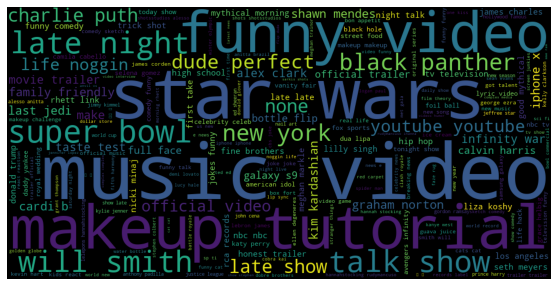

In [29]:
# slpitting the tags
tags = videos['tags'].map(lambda k: k.lower().split('|')).values 

# joining and making a complete list
k= (' '.join(videos['tags']))  
wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [30]:
videos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [31]:
df1 =pd.DataFrame(videos.channel_title.value_counts())
df1.columns=['times channel got trenidng']# how many times the channel got trending'
df1.head(6)

,times channel got trenidng
ESPN,203
The Tonight Show Starring Jimmy Fallon,197
Vox,193
Netflix,193
TheEllenShow,193
The Late Show with Stephen Colbert,187


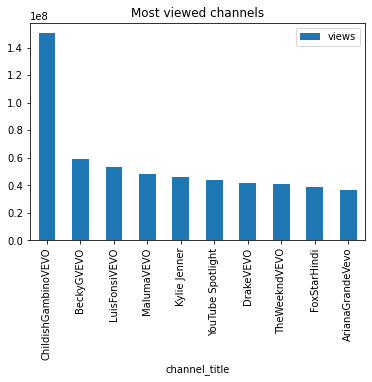

In [32]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most viewed channels');

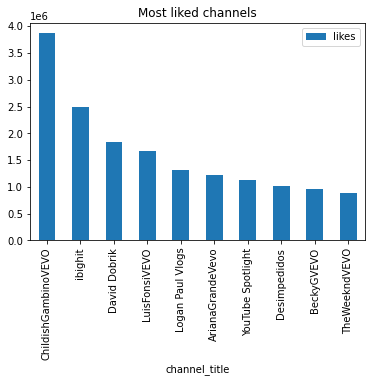

In [33]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes'].mean()).sort_values(by='likes',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

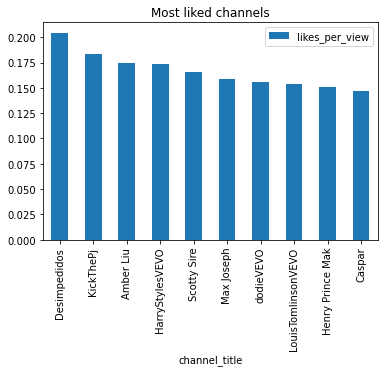

In [34]:
videos['likes_per_view']=videos['likes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes_per_view'].mean()).sort_values(by='likes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

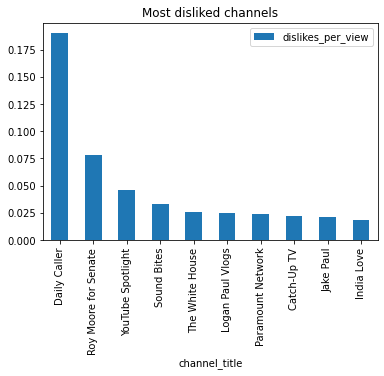

In [35]:
videos['dislikes_per_view']=videos['dislikes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['dislikes_per_view'].mean()).sort_values(by='dislikes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most disliked channels');


In [36]:
unique = pd.read_csv(r'E:\SentimentAnalysis\YouTube_DataSet\unique.csv',)

In [37]:
unique.sort_values(by='pos_comm',ascending=False).head(5)

,id,pos_comm,neg_comm,neutral_comm,total_comments
943,eERPlIdPJtI,426,32,142,600
593,Zmi9iQp6944,411,55,34,500
1345,zKriLekFPwg,399,46,255,700
1250,p25S_5P6ejg,387,38,75,500
533,fS5xHHqW-6E,380,25,195,600


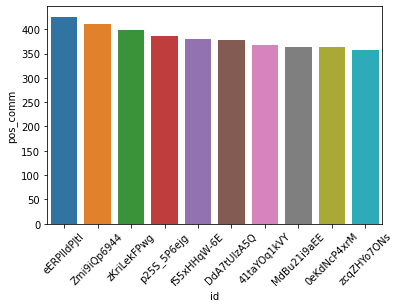

<Figure size 360x288 with 0 Axes>

In [46]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

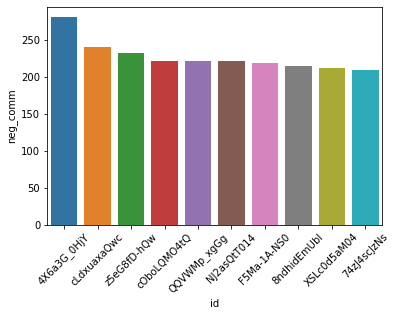

<Figure size 360x288 with 0 Axes>

In [47]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

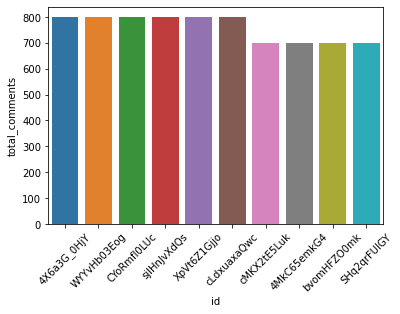

<Figure size 360x288 with 0 Axes>

In [48]:
sns.barplot(data=unique.sort_values(by='total_comments',ascending=False).head(10),x='id',y='total_comments')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

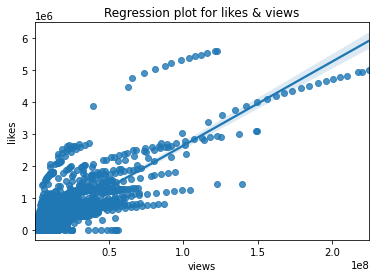

In [49]:
sns.regplot(data=videos,x='views',y='likes');
plt.title("Regression plot for likes & views");

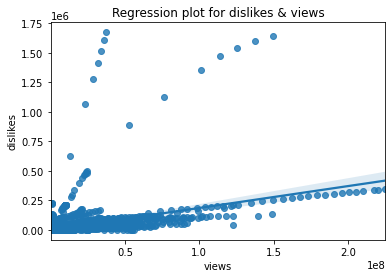

In [50]:
sns.regplot(data=videos,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");

<AxesSubplot:>

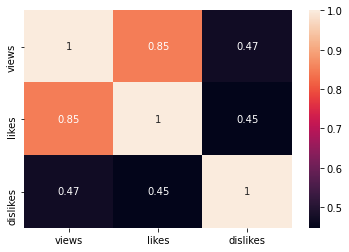

In [51]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)